# CRM / Online_retail II

Customer Segmentation with RFM and CLTV. Prediciton of purchease with BG-NBD/Gamma Gamma modelling.


DataSet: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

# RFM

----

# Data Understaning

In [ ]:
import datetime as dt
import pandas as pd

df_ = pd.read_excel("/content/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(525461, 8)

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316


In [ ]:
#Product features
print(df["Description"].nunique())
print(df["Description"].value_counts().head())

4681
Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: count, dtype: int64


In [ ]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [ ]:
df["Invoice"].nunique()

28816

# Data Preparation

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.groupby("Invoice").agg({"TotalPrice": "sum"}).head()

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


In [ ]:
#Data have returned data in Invoice column start with "C" -- delete all
df = df[~df["Invoice"].str.contains("C", na=False)]
df["Invoice"].nunique()

19215

In [ ]:
df = df[(df['Quantity'] > 0)]
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,407695.0,13.586686,1.0,2.0,5.0,12.0,19152.0,96.842229
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:46:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407695.0,3.294188,0.0,1.25,1.95,3.75,10953.5,34.756655
Customer ID,407695.0,15368.504107,12346.0,13997.0,15321.0,16812.0,18287.0,1679.7957
TotalPrice,407695.0,21.663261,0.0,4.95,11.9,19.5,15818.4,77.147356


# Calculating RFM Metrics

In [ ]:
print(df["InvoiceDate"].max())

today_date = dt.datetime(2010, 12, 11)
type(today_date)

2010-12-09 20:01:00


datetime.datetime

In [ ]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


In [ ]:
rfm.columns = ['recency', 'frequency', 'monetary']

rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4314.0,91.269819,96.944304,1.0,18.00,53.00,136.0000,374.00
frequency,4314.0,4.454103,8.168658,1.0,1.00,2.00,5.0000,205.00
monetary,4314.0,2047.288659,8912.523243,0.0,307.95,705.55,1722.8025,349164.35


In [ ]:
rfm = rfm[rfm["monetary"] > 0]
rfm.shape

(4312, 3)

# Calculating RFM Scores

In [ ]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4312.0,91.172542,96.861457,1.00,18.0000,53.00,136.0000,374.00
frequency,4312.0,4.455705,8.170213,1.00,1.0000,2.00,5.0000,205.00
monetary,4312.0,2048.238236,8914.481280,2.95,307.9875,706.02,1723.1425,349164.35


# Creating & Analysing RFM Segments

In [ ]:
# RFM segmetation
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])


recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        53.819242   343   1.201166   343   441.320000   343
at_Risk              152.158756   611   3.073650   611  1188.878316   611
cant_loose           124.116883    77   9.116883    77  4099.450000    77
champions              7.119155   663  12.553544   663  6852.264167   663
hibernating          213.885714  1015   1.126108  1015   403.977836  1015
loyal_customers       36.287062   742   6.830189   742  2746.067353   742
need_attention        53.265700   207   2.449275   207  1060.357005   207
new_customers          8.580000    50   1.000000    50   386.199200    50
potential_loyalists   18.793037   517   2.017408   517   729.510986   517
promising             25.747126    87   1.000000    87   367.086782    87

In [ ]:
rfm[rfm["segment"] == "cant_loose"].head()
rfm[rfm["segment"] == "cant_loose"].index


Index([12346.0, 12380.0, 12482.0, 12510.0, 12891.0, 12932.0, 13044.0, 13313.0,
       13680.0, 13782.0, 13799.0, 13856.0, 14025.0, 14063.0, 14160.0, 14221.0,
       14548.0, 14607.0, 14685.0, 14745.0, 15003.0, 15013.0, 15015.0, 15125.0,
       15141.0, 15222.0, 15306.0, 15321.0, 15359.0, 15369.0, 15372.0, 15443.0,
       15538.0, 15607.0, 15633.0, 15722.0, 15751.0, 15754.0, 15768.0, 15911.0,
       15912.0, 16027.0, 16032.0, 16158.0, 16177.0, 16197.0, 16335.0, 16467.0,
       16631.0, 16742.0, 16743.0, 16875.0, 16986.0, 17021.0, 17032.0, 17092.0,
       17113.0, 17157.0, 17188.0, 17230.0, 17268.0, 17426.0, 17448.0, 17454.0,
       17512.0, 17578.0, 17602.0, 17651.0, 17940.0, 17969.0, 17988.0, 18009.0,
       18051.0, 18064.0, 18094.0, 18251.0, 18258.0],
      dtype='float64', name='Customer ID')

In [ ]:
new_df = pd.DataFrame()
new_df["new_customer_id"] = rfm[rfm["segment"] == "new_customers"].index

new_df["new_customer_id"] = new_df["new_customer_id"].astype(int)

new_df.to_csv("new_customers.csv")

rfm.to_csv("rfm.csv")

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   recency          4312 non-null   int64   
 1   frequency        4312 non-null   int64   
 2   monetary         4312 non-null   float64 
 3   recency_score    4312 non-null   category
 4   frequency_score  4312 non-null   category
 5   monetary_score   4312 non-null   category
 6   RFM_SCORE        4312 non-null   object  
 7   segment          4312 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 215.4+ KB


# CUSTOMER LIFETIME VALUE

------

# Data Preparation

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_ = pd.read_excel("/content/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df = df[~df["Invoice"].str.contains("C", na=False)]
df.describe().T
df = df[(df['Quantity'] > 0)]
df.dropna(inplace=True)

df["TotalPrice"] = df["Quantity"] * df["Price"]

# CLTV Data Preperation

In [ ]:

cltv_c = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']
cltv_c.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12346.0,11,70,372.86
12347.0,2,828,1323.32
12348.0,1,373,222.16
12349.0,3,993,2671.14
12351.0,1,261,300.93


# Calculations for CLTV

In [ ]:
#Average Order Value (average_order_value = total_price / total_transaction)
cltv_c["average_order_value"] = cltv_c["total_price"] / cltv_c["total_transaction"]

#Purchase Frequency (total_transaction / total_number_of_customers)
cltv_c["purchase_frequency"] = cltv_c["total_transaction"] / cltv_c.shape[0]

#Repeat Rate & Churn Rate (number of customers making more than one purchase / all customers)
repeat_rate = cltv_c[cltv_c["total_transaction"] > 1].shape[0] / cltv_c.shape[0]

churn_rate = 1 - repeat_rate

#Profit Margin (profit_margin =  total_price * 0.10)
cltv_c['profit_margin'] = cltv_c['total_price'] * 0.10

#Customer Value (customer_value = average_order_value * purchase_frequency)
cltv_c['customer_value'] = cltv_c['average_order_value'] * cltv_c["purchase_frequency"]

#Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)
cltv_c["cltv"] = (cltv_c["customer_value"] / churn_rate) * cltv_c["profit_margin"]

cltv_c.sort_values(by="cltv", ascending=False).head()



,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.0,89,124216,349164.35,3923.194944,0.020631,34916.435,80.937494,8.579574e+06
14646.0,78,170342,248396.50,3184.570513,0.018081,24839.650,57.579161,4.342070e+06
14156.0,102,108107,196566.74,1927.124902,0.023644,19656.674,45.564845,2.719105e+06
14911.0,205,69722,152147.57,742.183268,0.047520,15214.757,35.268329,1.629056e+06
13694.0,94,125893,131443.19,1398.331809,0.021790,13144.319,30.468982,1.215856e+06


# Segmentation

In [ ]:
cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

cltv_c.sort_values(by="cltv", ascending=False).tail()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
15913.0,1,3,6.30,6.30,0.000232,0.630,0.001460,0.002793,D
13788.0,1,1,3.75,3.75,0.000232,0.375,0.000869,0.000990,D
14095.0,1,1,2.95,2.95,0.000232,0.295,0.000684,0.000612,D
14103.0,1,5,0.00,0.00,0.000232,0.000,0.000000,0.000000,D
14827.0,1,5,0.00,0.00,0.000232,0.000,0.000000,0.000000,D


In [ ]:
cltv_c.groupby("segment").agg({"count", "mean", "sum"})

total_transaction                   total_unit                        \
                    count       mean    sum      count         mean      sum   
segment                                                                        
D                    1079   1.228916   1326       1079   109.004634   117616   
C                    1078   2.003711   2160       1078   283.056586   305135   
B                    1078   3.769017   4063       1078   680.158627   733211   
A                    1079  10.811863  11666       1079  4062.337349  4383262   

        total_price                           average_order_value  ...  \
              count         mean          sum               count  ...   
segment                                                            ...   
D              1079   178.188258   192265.130                1079  ...   
C              1078   475.896524   513016.453                1078  ...   
B              1078  1131.359184  1219605.200                1078  ...   
A              1079  6401.405460  6907116.491                1079  ...   

        purchase_frequency profit_margin                           \
                       sum         count        mean          sum   
segment                                                             
D                 0.307371          1079   17.818826   19226.5130   
C                 0.500695          1078   47.589652   51301.6453   
B                 0.941817          1078  113.135918  121960.5200   
A                 2.704219          1079  640.140546  690711.6491   

        customer_value                         cltv                \
                 count      mean          sum count          mean   
segment                                                             
D                 1079  0.041305    44.567717  1079      2.640712   
C                 1078  0.110314   118.918974  1078     16.868519   
B                 1078  0.262253   282.708669  1078     96.057387   
A                 1079  1.483868  1601.093299  1079  23408.058426   

                       
                  sum  
segment                
D        2.849328e+03  
C        1.818426e+04  
B        1.035499e+05  
A        2.525730e+07  

[4 rows x 24 columns]

In [ ]:
cltv_c.to_csv("cltc_c.csv")

# BG-NBD ve Gamma-Gamma ile CLTV Prediction

In [ ]:
!pip install lifetimes
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



df = df_.copy()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00


# Data Preparation

In [ ]:
df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]


In [ ]:
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

df["TotalPrice"] = df["Quantity"] * df["Price"]

today_date = dt.datetime(2011, 12, 11)

# CLT Data Preperation

In [ ]:
cltv_df = df.groupby('Customer ID').agg(
    {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                     lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
     'Invoice': lambda Invoice: Invoice.nunique(),
     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

cltv_df.columns = cltv_df.columns.droplevel(0)

cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']


In [ ]:
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df["recency"] = cltv_df["recency"] / 7

cltv_df["T"] = cltv_df["T"] / 7

# BG-NBD Modelling

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2893 subjects, a: 1.93, alpha: 9.47, b: 6.27, r: 2.22>

In [ ]:
#Expected purches after a week
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

bgf.predict(1,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)


cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])

In [ ]:
#Expected purches after a month
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

11.608238398752206

In [ ]:
#Expected purches after 3 months
cltv_df["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

bgf.predict(4 * 3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

33.450223014701386

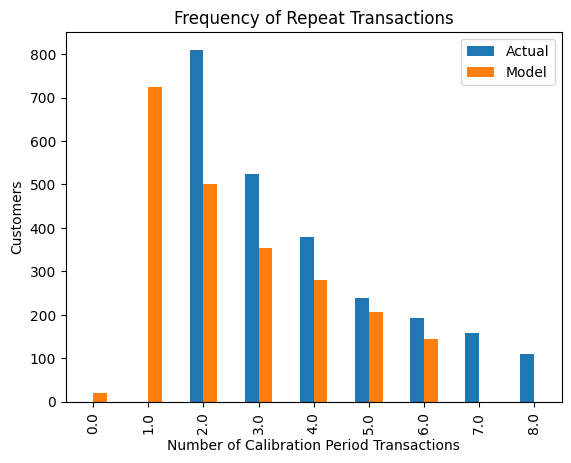

In [ ]:
plot_period_transactions(bgf)
plt.show()

# GAMMA-GAMMA Modelling

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).head(10)

ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).head(10)

cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])
cltv_df.sort_values("expected_average_profit", ascending=False).head(10)


,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
Customer ID,,,,,,,,
12357.0,0.000000,55.571429,2,5633.465000,7.087625e-05,2.772510e-04,7.858602e-04,6172.345889
17450.0,10.000000,62.714286,7,5321.585000,4.538282e-06,1.768083e-05,4.961300e-05,5457.788339
14091.0,6.285714,99.857143,2,4584.045000,4.050678e-05,1.598720e-04,4.632589e-04,5022.921645
14088.0,2.000000,60.285714,3,4512.990000,2.556784e-05,9.998788e-05,2.832009e-04,4792.191502
18102.0,53.285714,105.571429,89,3526.442416,3.750554e-23,1.465476e-22,4.140932e-22,3533.392573
12409.0,20.571429,80.857143,4,3086.655000,3.461201e-04,1.358884e-03,3.885857e-03,3228.011340
14646.0,51.714286,105.428571,78,3108.767179,3.310913e-21,1.293861e-20,3.657174e-20,3115.765818
12454.0,3.571429,60.285714,4,2811.445000,1.247881e-05,4.872953e-05,1.375222e-04,2940.284688
16684.0,50.285714,104.714286,27,2847.767037,2.567022e-08,1.005072e-07,2.854277e-07,2866.378091


# Calculation of CLTV with BG-NBD ve GG modelling

In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=3,  # 3 months
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)

cltv.head()


Customer ID
12346.0     0.000181
12347.0     3.275062
12349.0    13.746351
12352.0     0.376328
12356.0     1.908140
Name: clv, dtype: float64

In [ ]:
cltv = cltv.reset_index()

cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
67,12497.0,34.857143,92.142857,2,2563.820000,0.004208,0.016593,0.047960,2810.179757,142.887244
1671,15823.0,51.142857,104.571429,3,1292.050000,0.006209,0.024494,0.070878,1372.925477,103.179795
83,12557.0,50.142857,103.285714,4,1681.295000,0.004576,0.018030,0.052032,1758.735051,96.999557
1059,14564.0,42.857143,105.142857,2,1302.810000,0.004429,0.017490,0.050760,1429.002092,76.937065
6,12358.0,50.857143,104.571429,3,901.236667,0.006078,0.023977,0.069381,958.048219,70.479500
449,13373.0,45.285714,104.857143,3,1424.980000,0.003814,0.015045,0.043538,1514.040503,69.893998
58,12477.0,31.857143,89.142857,3,2352.210000,0.002297,0.009041,0.026021,2498.363724,68.887943
2127,16732.0,46.857143,104.571429,3,1175.276667,0.004426,0.017458,0.050517,1248.961947,66.898698
42,12435.0,48.571429,105.428571,4,1460.222500,0.003454,0.013613,0.039311,1527.608093,63.658485
221,12873.0,40.571429,97.428571,2,826.650000,0.005206,0.020540,0.059474,907.466532,57.230185


# Segmentation of Custumers with CLTV

In [ ]:
cltv_final

cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

cltv_final.sort_values(by="clv", ascending=False).head(50)


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
67,12497.0,34.857143,92.142857,2,2563.820000,0.004208,0.016593,0.047960,2810.179757,142.887244,A
1671,15823.0,51.142857,104.571429,3,1292.050000,0.006209,0.024494,0.070878,1372.925477,103.179795,A
83,12557.0,50.142857,103.285714,4,1681.295000,0.004576,0.018030,0.052032,1758.735051,96.999557,A
1059,14564.0,42.857143,105.142857,2,1302.810000,0.004429,0.017490,0.050760,1429.002092,76.937065,A
6,12358.0,50.857143,104.571429,3,901.236667,0.006078,0.023977,0.069381,958.048219,70.479500,A
449,13373.0,45.285714,104.857143,3,1424.980000,0.003814,0.015045,0.043538,1514.040503,69.893998,A
58,12477.0,31.857143,89.142857,3,2352.210000,0.002297,0.009041,0.026021,2498.363724,68.887943,A
2127,16732.0,46.857143,104.571429,3,1175.276667,0.004426,0.017458,0.050517,1248.961947,66.898698,A
42,12435.0,48.571429,105.428571,4,1460.222500,0.003454,0.013613,0.039311,1527.608093,63.658485,A
221,12873.0,40.571429,97.428571,2,826.650000,0.005206,0.020540,0.059474,907.466532,57.230185,A


In [ ]:
cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})

Customer ID                           recency             \
              count          mean         sum   count       mean   
segment                                                            
D               724  15506.726519  11226870.0     724  22.717048   
C               723  15325.250346  11080156.0     723  23.359218   
B               723  15349.189488  11097464.0     723  30.214582   
A               723  15222.006916  11005511.0     723  37.845287   

                          T                          frequency  ...  \
                  sum count       mean           sum     count  ...   
segment                                                         ...   
D        16447.142857   724  87.959353  63682.571429       724  ...   
C        16888.714286   723  84.997234  61453.000000       723  ...   
B        21845.142857   723  89.848449  64960.428571       723  ...   
A        27362.142857   723  95.340842  68931.428571       723  ...   

        expected_purc_1_month expected_purc_3_month                       \
                          sum                 count      mean        sum   
segment                                                                    
D                    0.099059                   724  0.000391   0.283226   
C                    0.783037                   723  0.003103   2.243500   
B                    2.737323                   723  0.010881   7.867149   
A                    7.988819                   723  0.031890  23.056348   

        expected_average_profit                              clv             \
                          count        mean            sum count       mean   
segment                                                                       
D                           724  338.032356  244735.425590   724   0.081883   
C                           723  351.796299  254348.723915   723   0.792449   
B                           723  389.178425  281376.001442   723   3.131898   
A                           723  498.258863  360241.157640   723  14.401344   

                       
                  sum  
segment                
D           59.283604  
C          572.940919  
B         2264.362399  
A        10412.171787  

[4 rows x 30 columns]